# LHCb Upgrade II extrapolations

This is a script to make plots showing the expected evolution of LHCb's sensitivities in the context of existing LHCb and non-LHCb measurements.

If you're in a rush, just press the fast-forward button above ($\blacktriangleright\blacktriangleright$).

The script will generate a plot that will be saved as `output.pdf` and `output.png`. These will appear in the file list in the previous tab where you can tick the box next to one of the files (one at a time) and click the "Download" button that appears above the list.

## Input data

The minimal thing you will want to do is edit the list of measurements in the following input box. This is a list of python dictionaries, one for each observable that you want to have appear on the same plot. There are two examples given and the one to be used has to be copied to a variable called `measurments`.

The observable name is printed in the bottom-left corner of the plot.

Then there are three groups of measurements, one reflecting the current situation, one the medium-term (2025) and one the ultimate precision (300/fb). For each of these you can provide a list of measurements. Every measurement is itself encoded in a dictionary with four keys:
- `label`: The label printed above the line to indicate the precision
- `uncty`: The uncertainty of this measurement
- `faint`: A boolean to indicate whether to display this measurement with a thinner line (can be True e.g. for individual measurements that are then combined in an average that is also shown)
- `external`: A boolean that is True e.g. for world average values or for Belle (II) measurements, which are displayed in a different colour

In [1]:
measurements_minimal = [
    {
    'observable': '$A_{\Gamma}$',
    'current':  [{'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False}],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False}],
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False}],   
    },
]

measurements_many = [
    {
    'observable': '$A_{\Gamma}$',
    'current':  [{'label': 'LHCb $KK$', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb $\pi\pi$', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
    },
    {
    'observable': '$A_{\Gamma}$ [cm]',
    'current':  [{'label': 'LHCb $KK$', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb $\pi\pi$', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
    },
    {
    'observable': '$A_{\Gamma}$ [$^{\circ}$]',
    'current':  [{'label': 'LHCb $KK$', 'uncty': 3e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
    },
    {
    'observable': '$A_{\Gamma}$ [%]',
    'current':  [{'label': 'LHCb $KK$', 'uncty': 3e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb $\pi\pi$', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'another LHCb', 'uncty': 6e-4, 'faint': True, 'external': False},
                 {'label': 'LHCb avg.', 'uncty': 2.8e-4, 'faint': False, 'external': False},
                 {'label': 'HFLAV WA', 'uncty': 2.8e-4, 'faint': False, 'external': True},],
    'medium':   [{'label': 'LHCb avg.', 'uncty': 1e-4, 'faint': False, 'external': False},
                 {'label': 'Belle II', 'uncty': 3.5e-4, 'faint': False, 'external': True},],   
    'ultimate': [{'label': 'LHCb avg.', 'uncty': 3e-5, 'faint': False, 'external': False},],   
    },
]

measurements = measurements_many

## Additional configuration

Below you can alter the appearance of the plot although there is a point in favour of a uniform appearance.

In [2]:
colLHCb = 'k'           # colour for LHCb measurements
colExt = '#CA521F'   # colour for non-LHCb measurements
nominalWidth = 3        # width for main measurements
faintWidth = 1          # width for individual measurements contributing to main

# The following numbers define the horizontal size of the different parts of the plot
# width per measurement = 5, width side bar = 1.83, padding = 0.9
binwidth = 5
sidebarwidth = 1.83
padding = 0.9

# Labels for different periods
labels = {
    'current': 'Current',
    'medium': '2025',
    'ultimate': 'HL-LHC'
}

# Background colours
bgcols = {
    'current': '#D1E6F7',
    'medium': '#A5C8E6',
    'ultimate': '#77A4CA',
    'line': '#336793'
}

# Fonts
# Measurement labels
font1 = {'family' : 'sans-serif',
        'color'  : 'k',
        'size'   : 18,
       }

# Labels for different periods
font2 = {'family' : 'sans-serif',
        'color'  : bgcols['line'],
        'size'   : 18,
       }

# Observable in bottom-left corner
font3 = {'family' : 'sans-serif',
        'color'  : 'k',
        'size'   : 42,
       }

# LHCb in top-right corner
font4 = {'family' : 'sans-serif',
        'color'  : 'k',
        'size'   : 34,
       }

## Helper functions

Below are helper functions to do the heavy lifting.

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def ceilOOM(x):
    # round to next smaller order or magnitue
    return np.floor(np.log10(x))

def printError(x):
    power = np.floor(np.log10(x))
    return r'$\pm {%.1f}\times 10^{%d}$'%(x/(10**power),int(power))

def draw_background(a):
    # draw background colouring
    a.fill([0.5,0.5,1.5,1.5],[nult+nmed+2,height,height,nult+nmed+2],
           fill=True,facecolor=bgcols['current'],linewidth=0,zorder=1)
    a.fill([0.5,0.5,1.5,1.5],[nult+nmed+2,nult+1,nult+1,nult+nmed+2],
           fill=True,facecolor=bgcols['medium'],linewidth=0,zorder=1)
    a.fill([0.5,0.5,1.5,1.5],[-0.4,nult+1,nult+1,-0.4],
           fill=True,facecolor=bgcols['ultimate'],linewidth=0,zorder=1)
    a.plot([0.5,1.5], [nult+1]*2, '-',color=bgcols['line'],linewidth=1)
    a.plot([0.5,1.5], [nult+nmed+2]*2, '-',color=bgcols['line'],linewidth=1)

def prep_axes(a,height):
    # prepare axes
    a.set_xlim(0.5,1.5)
    a.set_ylim(-0.4,height)
    a.yaxis.set_tick_params(labelleft=False)
    a.xaxis.set_tick_params(labelbottom=False)
    a.set_xticks([])
    a.set_yticks([])

def draw_measurements(meas,xrange,offset):
    # draw line, label, and uncertainty
    totm = len(meas)
    offset -= 0.15
    for item,i in zip(meas,range(totm)):
        sigma = item['uncty']
        size = sigma*0.5/xrange
        c = colLHCb
        if item['external']: c = colExt
        w = nominalWidth
        if item['faint']: w = faintWidth
        a.plot([1.-size,1.+size], [totm-i+offset]*2, '-',color=c,linewidth=w)
        a.plot([1.-size]*2, [totm-i+offset-0.1,totm-i+offset+0.1], '-',color=c,linewidth=w)
        a.plot([1.+size]*2, [totm-i+offset-0.1,totm-i+offset+0.1], '-',color=c,linewidth=w)
        a.text(1.01, totm-i+offset+0.15, printError(sigma),fontdict=font1,ha='left',va='bottom',zorder=2)
        a.text(0.99, totm-i+offset+0.15, item['label'],fontdict=font1,ha='right',va='bottom',zorder=2)

## Plotting

The bit below brings is all together and produces the plot.

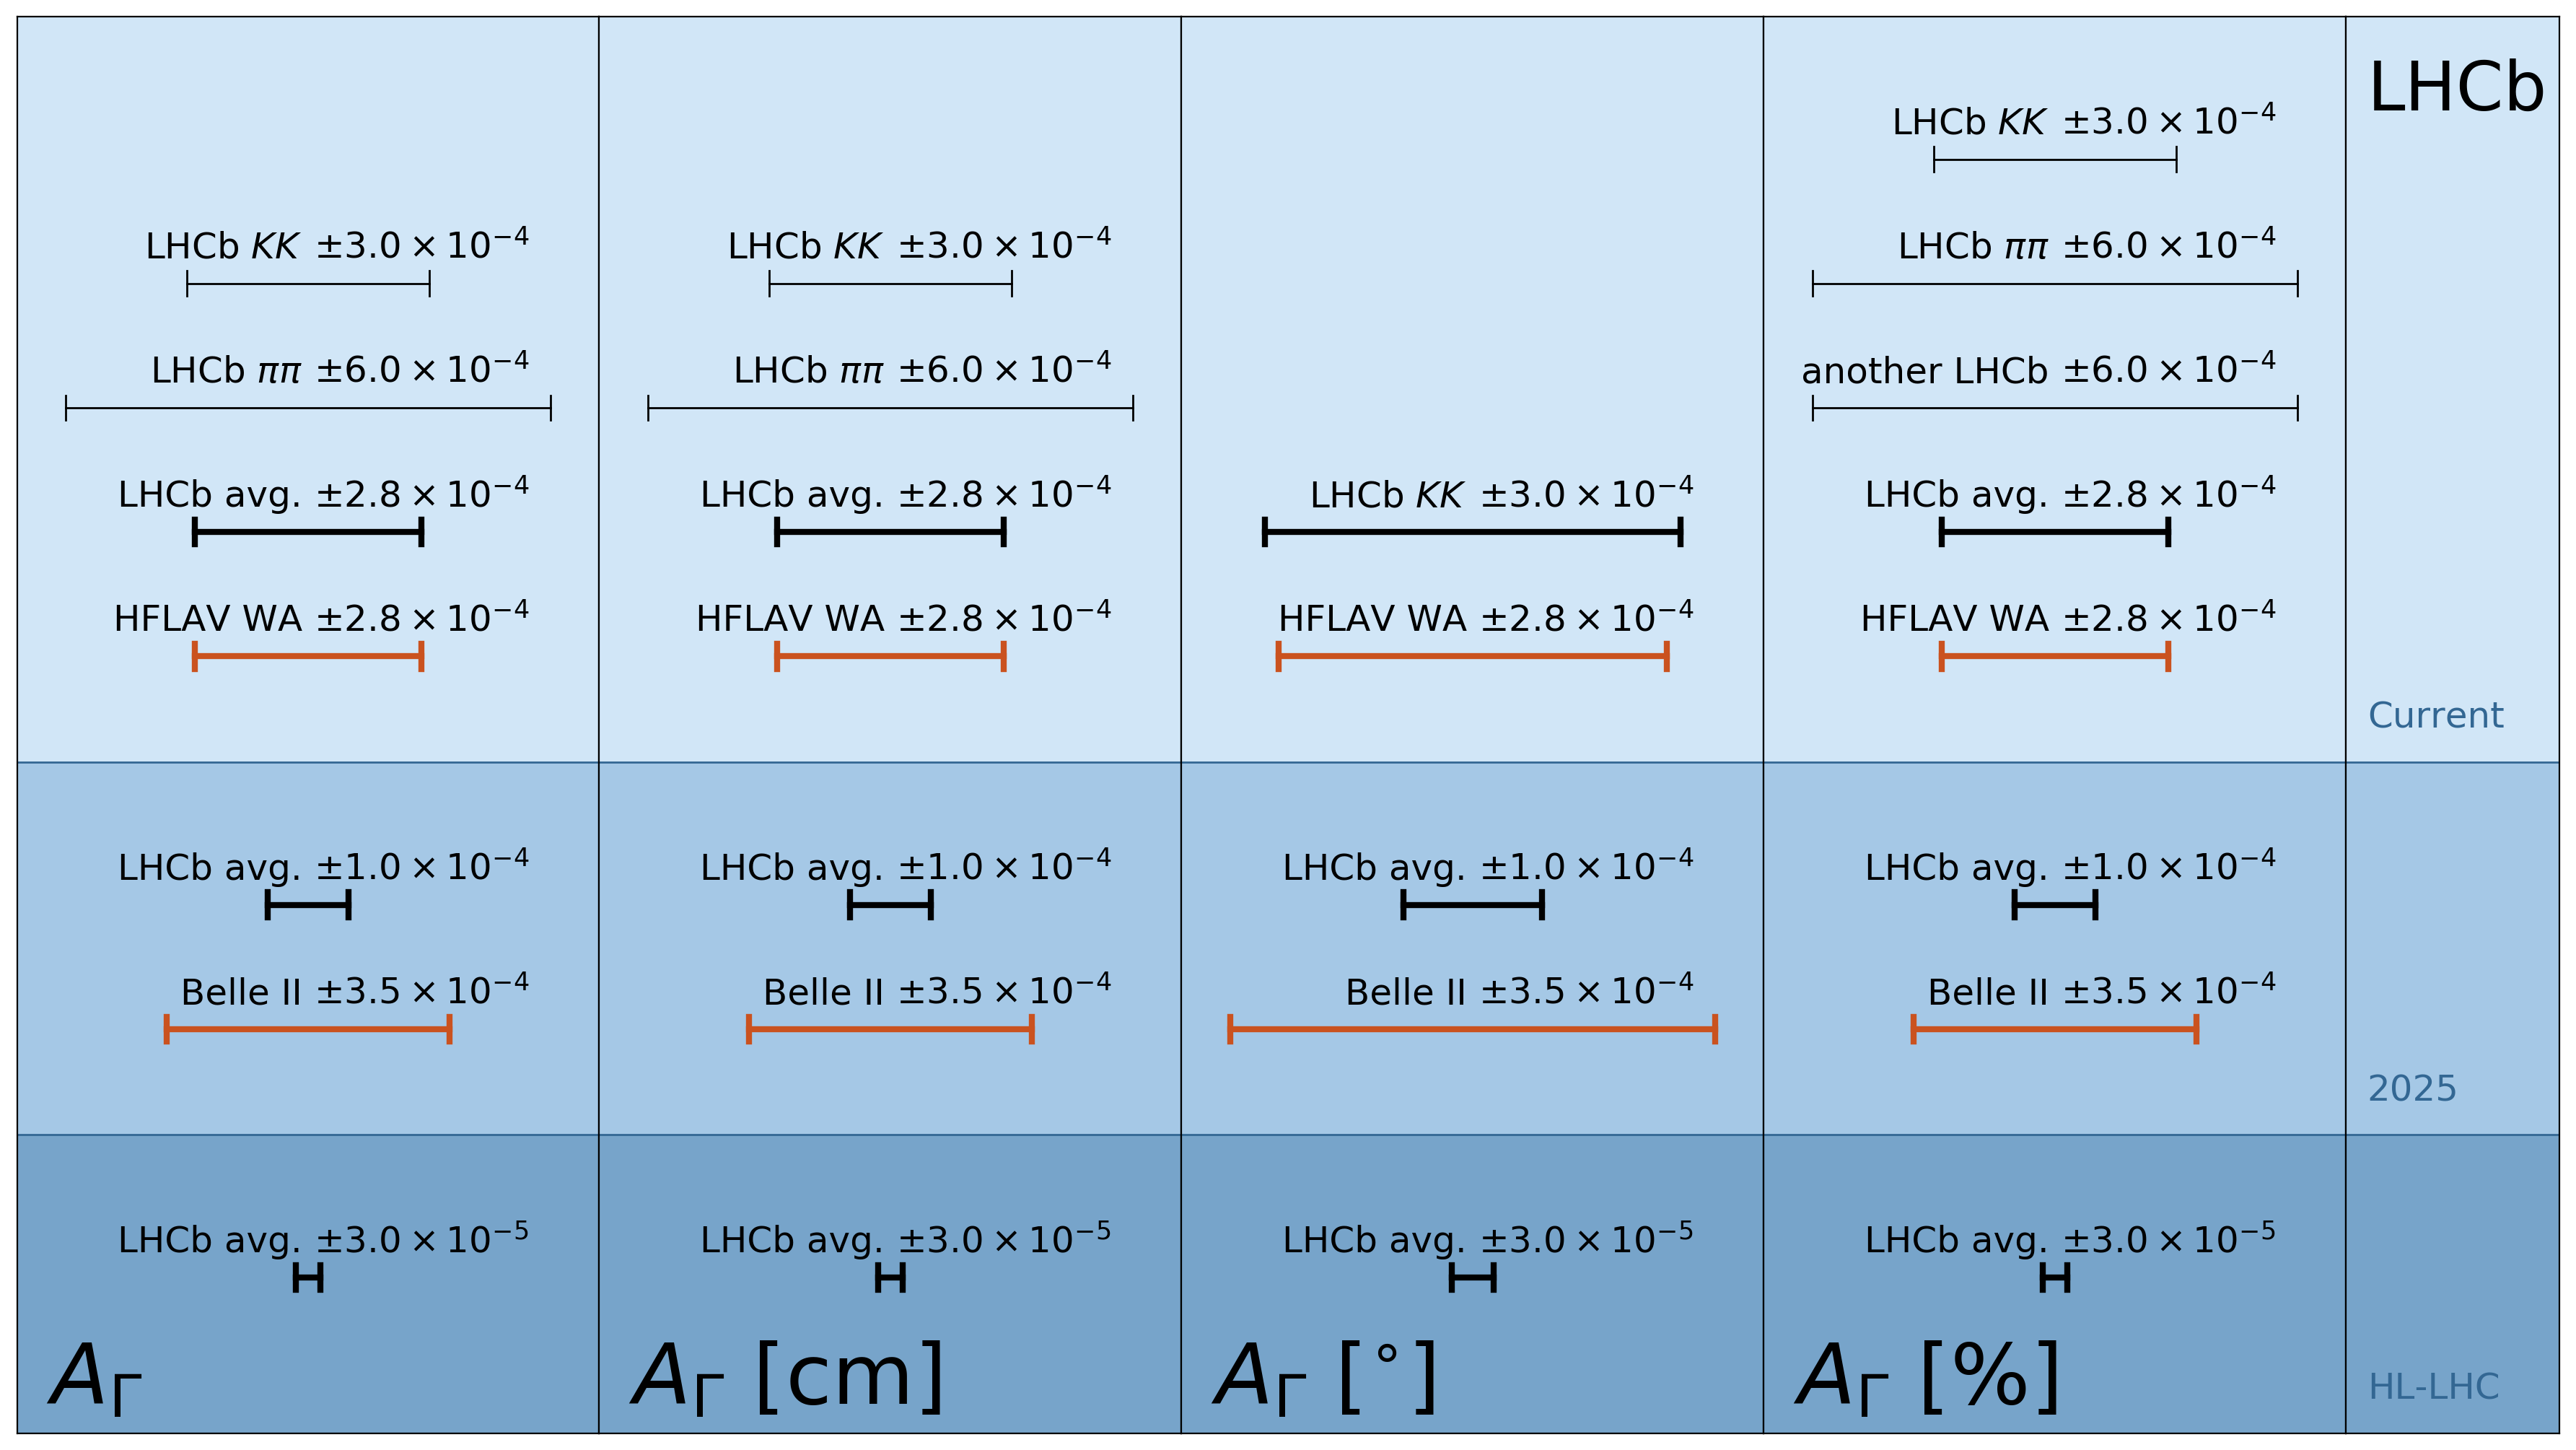

In [6]:
# work out the maximum number of observables and from it the total height
nbins = len(measurements)
ncur = nmed = nult = 0
for m in measurements:
    ncur = max(ncur,len(m['current']))
    nmed = max(nmed,len(m['medium']))
    nult = max(nult,len(m['ultimate']))
height = ncur+nmed+nult+3

# prepare different pads for observables and side bar
fig = plt.figure(figsize = (nbins*binwidth+sidebarwidth+padding,height+2),dpi=200) 
ratios = [binwidth]*nbins
ratios.append(sidebarwidth)
gs1 = gridspec.GridSpec(1,nbins+1,width_ratios=ratios)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

# loop over observables and plot
for m,n in zip(measurements,range(nbins)):
    # prepare plot and print observable in bottom left
    a = plt.subplot(gs1[n])
    prep_axes(a,height)
    draw_background(a)
    a.text(0.55,-0.3,m['observable'],fontdict=font3,ha='left',va='bottom',zorder=2)

    # determine largest uncertainty to get scale
    maxuncty = 0.
    for item in m['current']+m['medium']+m['ultimate']:
        maxuncty = max(maxuncty,item['uncty'])
    xrange = 1.2 * maxuncty

    # draw three groups of measurements
    draw_measurements(m['ultimate'],xrange,0)
    draw_measurements(m['medium'],xrange,nult+1)
    draw_measurements(m['current'],xrange,nult+1+nmed+1)

# Add bar with labels on the right    
aDeco = plt.subplot(gs1[-1])
prep_axes(aDeco,height)
draw_background(aDeco)
aDeco.text( 0.6, nult+1+nmed+1.5, labels['current'],fontdict=font2,ha='left',va='top')
aDeco.text( 0.6, nult+1.5, labels['medium'],fontdict=font2,ha='left',va='top')
aDeco.text( 0.6, 0.1, labels['ultimate'],fontdict=font2,ha='left',va='top')
aDeco.text( 0.6, height-0.6, 'LHCb',fontdict=font4,ha='left',va='center')

plt.savefig('output.png', bbox_inches='tight')
plt.savefig('output.pdf', bbox_inches='tight')
plt.show()